# Assignment 1

In [35]:
import pandas as pd
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.feature_extraction.text import TfidfVectorizer
import matplotlib.pyplot as plt
# The following line is needed to show plots inline in notebooks
%matplotlib inline 

In [313]:
data = pd.read_csv('Kaggle_Salary.csv')
# drop row index 0 because it holds the Questions (inplace is to remove permanently)
data.drop(data.index[0], inplace=True)

/home/aaron/.local/lib/python3.5/site-packages/IPython/core/interactiveshell.py:3058: DtypeWarning: Columns (1,3,9,11,22,24,25,26,27,28,29,45,57,65,84,86,88,108,110,124,126,151,195,209,224,250,263,265,277,278,279,280,281,282,283,284,285,286,287,288,289,290,291,305,307,323,326,327,330,342,372,385,386,394,395) have mixed types. Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)


## 1. Data Cleaning

### Label Salary

In [314]:
# Label salary
def encode_salary(salary):
    if "0-10,000" in salary:
        return 1
    if "10-20,000" in salary:
        return 2
    if "20-30,000" in salary:
        return 3
    if "30-40,000" in salary:
        return 4
    if "40-50,000" in salary:
        return 5
    if "50-60,000" in salary:
        return 6
    if "60-70,000" in salary:
        return 7
    if "70-80,000" in salary:
        return 8
    if "80-90,000" in salary:
        return 9
    if "90-100,000" in salary:
        return 10
    if "100-125,000" in salary:
        return 11
    if "125-150,000" in salary:
        return 12
    if "150-200,000" in salary:
        return 13
    if "200-250,000" in salary:
        return 14
    if "250-300,000" in salary:
        return 15
    if "300-400,000" in salary:
        return 16
    if "400-500,000" in salary:
        return 17
    if "500,000+" in salary:
        return 18
# Create a new column with the encoded salary
data["Salary_label"]=data["Q9"].apply(encode_salary)

#### Gender

In [315]:
# Combine gender cateogires less than 150 with Other
gender_count = data.Q1.value_counts()
value_mask = data.Q1.isin(gender_count.index[gender_count < 150]) 
data.loc[value_mask,'Q1'] = "Other"

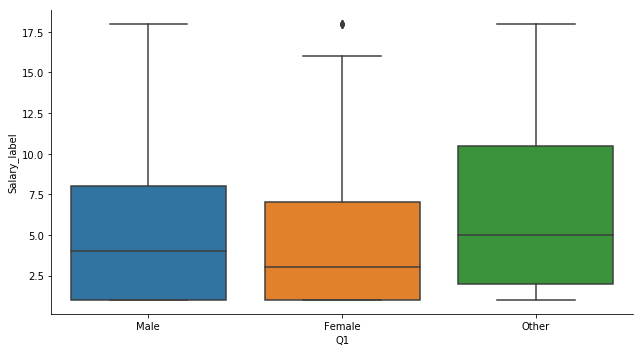

In [40]:
sns.catplot(x='Q1', y='Salary_label', data=data, kind="box").fig.set_size_inches(10,5)

#### Age

In [316]:
age_count = data.Q2.value_counts()
value_mask = data.Q2.isin(age_count.index[age_count < 180]) 
data.loc[value_mask,'Q2'] = "70+"

#### Countries

In [317]:
# Categorize any country less than a threshold count in to other
countries_count = data.Q3.value_counts()
value_mask = data.Q3.isin(countries_count.index[countries_count < 100]) 
data.loc[value_mask,'Q3'] = "Other"
data.Q3.value_counts()
# Simplify Name
data['Q3'] = data['Q3'].replace('United States of America', 'USA')
data['Q3'] = data['Q3'].replace('United Kingdom of Great Britain and Northern Ireland', 'UKGBNI')
data['Q3'] = data['Q3'].replace('I do not wish to disclose my location', 'Other')


#### Highest Level of Education

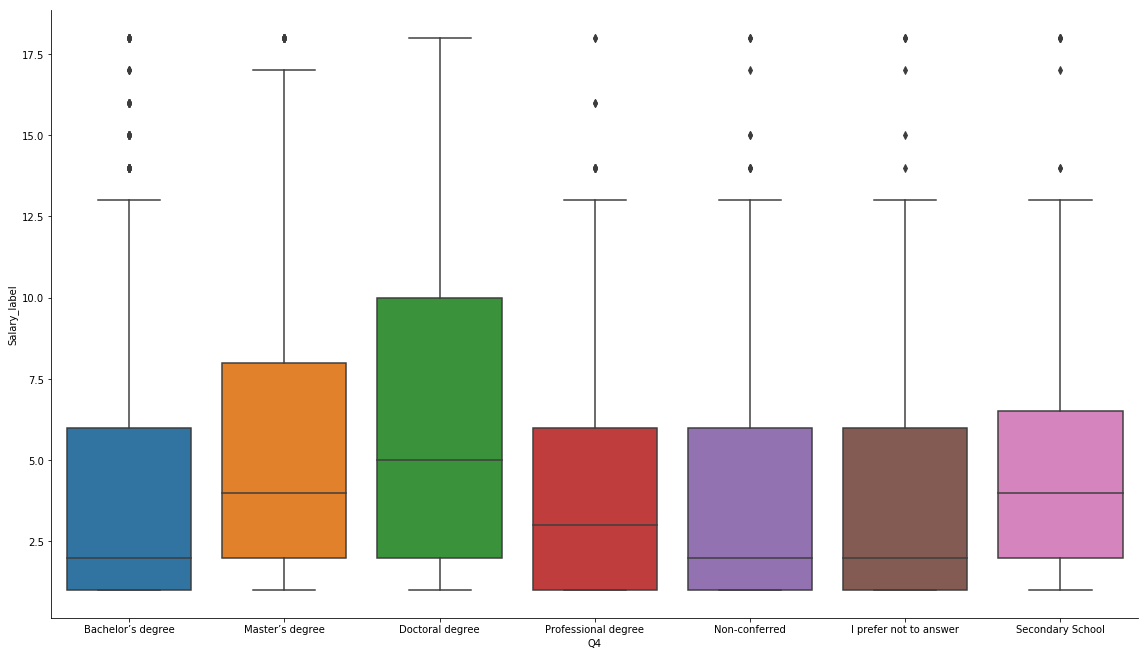

In [318]:
degree_count = data.Q4.value_counts(normalize=True)
# Simplify category name
data['Q4'] = data['Q4'].replace('Some college/university study without earning a bachelor’s degree', 'Non-conferred')
data['Q4'] = data['Q4'].replace('No formal education past high school', 'Secondary School')
sns.catplot(x='Q4', y='Salary_label', data=data, kind="box",legend = False ).fig.set_size_inches(20,10)

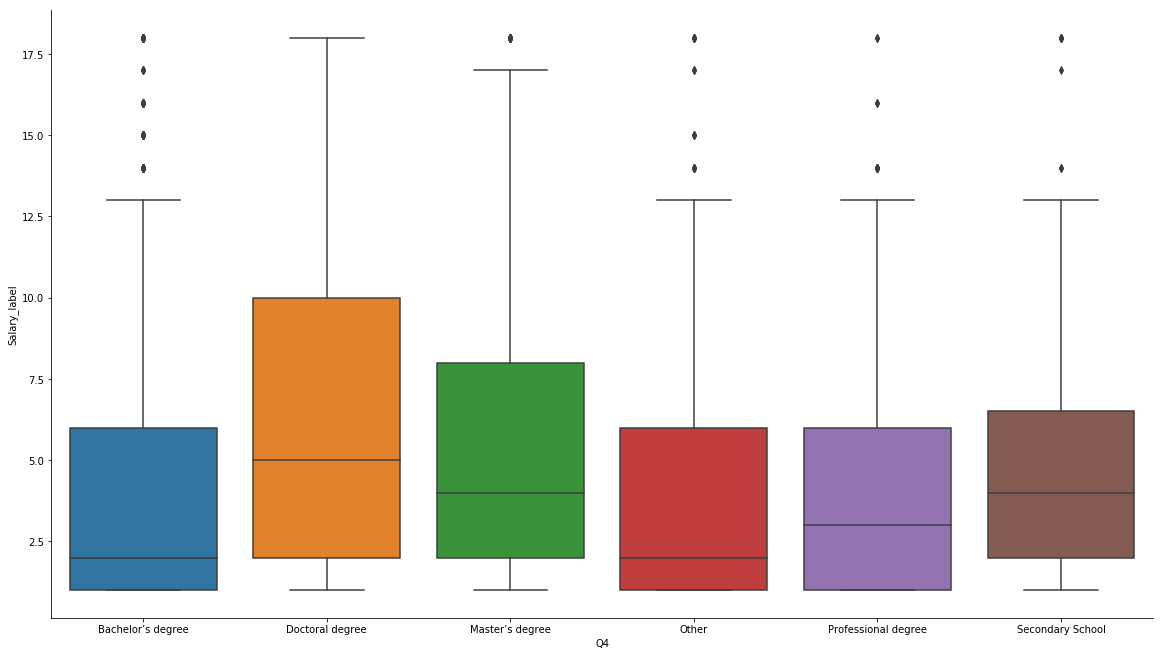

In [132]:
# Since "Non-conferred" and "I prefer not to answer" show similar salary earnings, I can combine them
data['Q4'] = data['Q4'].replace('Non-conferred', 'Other')
data['Q4'] = data['Q4'].replace('I prefer not to answer', 'Other')
sns.catplot(x='Q4', y='Salary_label', data=data, kind="box").fig.set_size_inches(20,10)

##### Major in University/College

In [319]:
# There is 135 missing values
a = data[data['Q5'].isna()]
# All missing values belong to those who only completed Secondary School
a.Q4.value_counts(normalize=True)
# Fill Nan values in Major with Secondary School
data['Q5'] = data['Q5'].fillna('Secondary School')

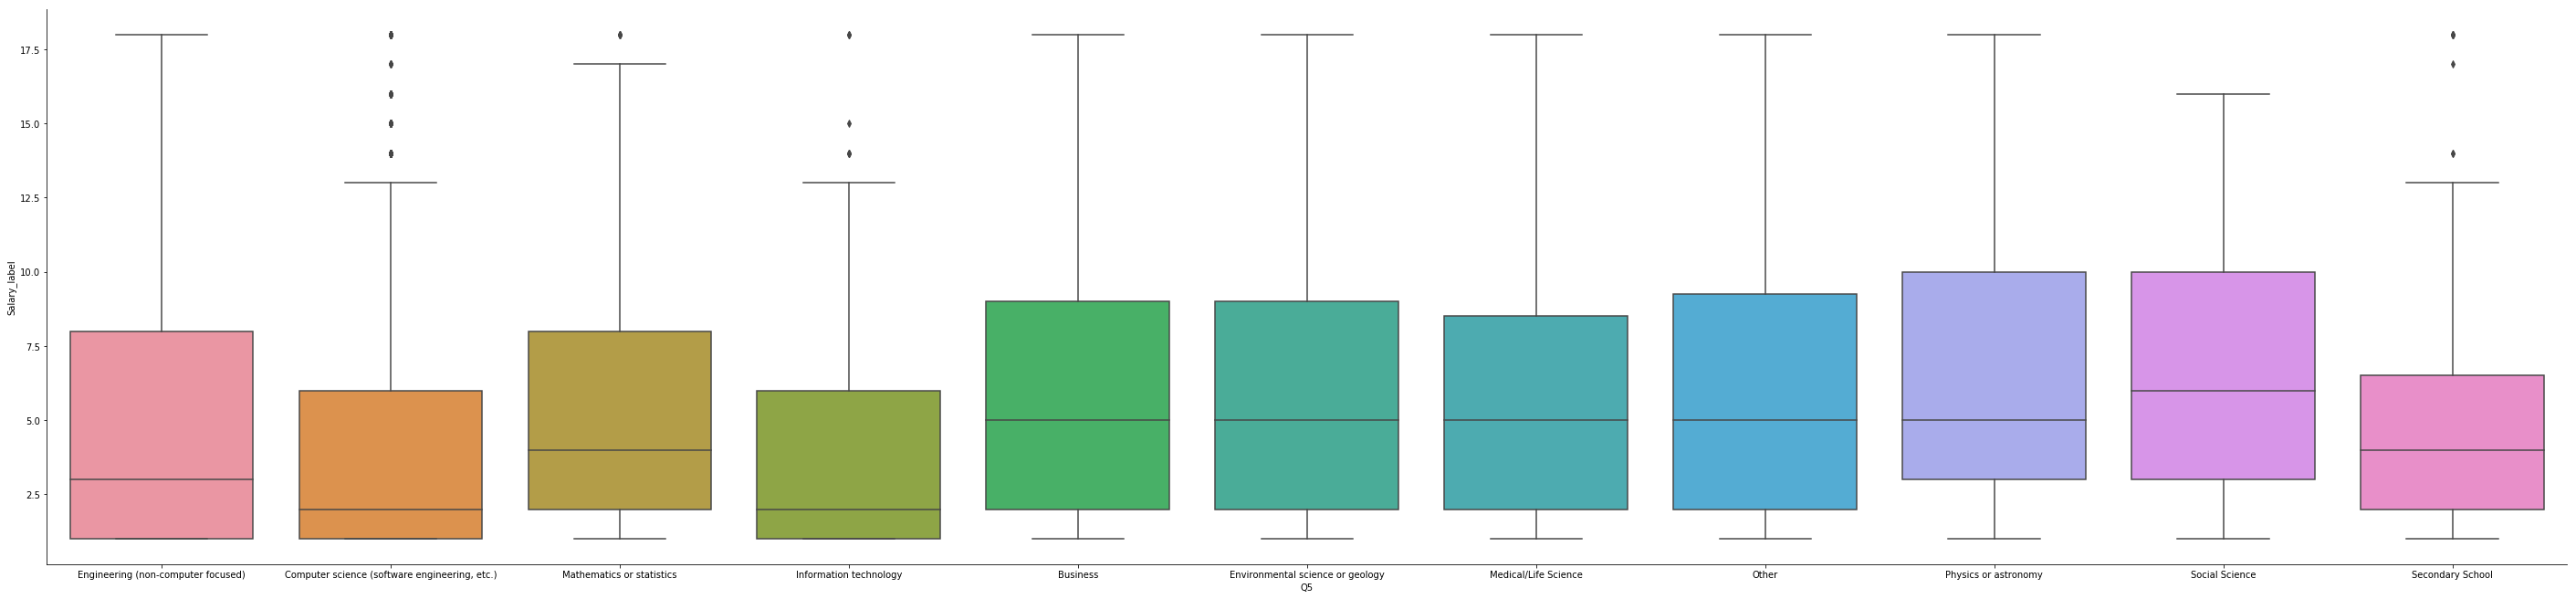

In [320]:
# Simplified naming
data['Q5'] = data['Q5'].replace('A business discipline (accounting, economics, finance, etc.)', 'Business')
data['Q5'] = data['Q5'].replace('Information technology, networking, or system administration', 'Information technology')
data['Q5'] = data['Q5'].replace('Medical or life sciences (biology, chemistry, medicine, etc.)', 'Medical/Life Science')
data['Q5'] = data['Q5'].replace('Social sciences (anthropology, psychology, sociology, etc.)', 'Social Science')
data['Q5'] = data['Q5'].replace('Humanities (history, literature, philosophy, etc.)', 'Humanities')
# Grouped together non-STEM with others
data['Q5'] = data['Q5'].replace('I never declared a major', 'Other')
data['Q5'] = data['Q5'].replace('Fine arts or performing arts', 'Other')
data['Q5'] = data['Q5'].replace('Humanities', 'Other')
sns.catplot(x='Q5', y='Salary_label', data=data, kind="box").fig.set_size_inches(60,10)

##### Position Title

In [321]:
# Eliminate position titles less than a threshold
title_count = data.Q6.value_counts()
value_mask = data.Q6.isin(title_count.index[title_count < 100]) 
data.loc[value_mask,'Q6'] = "Other"

##### Industry

In [322]:
industry_count = data.Q7.value_counts(normalize=True)
industry_count

Computers/Technology                      0.270854
I am a student                            0.145700
Academics/Education                       0.128395
Accounting/Finance                        0.076544
Other                                     0.048610
Online Service/Internet-based Services    0.046341
Medical/Pharmaceutical                    0.038369
Government/Public Service                 0.033962
Insurance/Risk Assessment                 0.029425
Manufacturing/Fabrication                 0.028194
Marketing/CRM                             0.025018
Retail/Sales                              0.023073
Energy/Mining                             0.022360
Broadcasting/Communications               0.020675
Online Business/Internet-based Sales      0.017629
Shipping/Transportation                   0.015361
Non-profit/Service                        0.009916
Hospitality/Entertainment/Sports          0.009852
Military/Security/Defense                 0.009722
Name: Q7, dtype: float64

##### Years of Experience 

In [323]:
# Recategorize YOE
data['Q8'] = data['Q8'].replace('0-1', '0-3') # 0-3 years
data['Q8'] = data['Q8'].replace('1-2', '0-3')
data['Q8'] = data['Q8'].replace('2-3', '0-3')
data['Q8'] = data['Q8'].replace('3-4', '3-5') # 3-5 years
data['Q8'] = data['Q8'].replace('4-5', '3-5')
data['Q8'] = data['Q8'].replace('20-25', '20-30') # 20-30 years
data['Q8'] = data['Q8'].replace('25-30', '20-30')
data.Q8.value_counts(normalize=True)

0-3      0.564710
3-5      0.159773
5-10     0.128509
10-15    0.073145
15-20    0.038755
20-30    0.025728
30 +     0.009379
Name: Q8, dtype: float64

In [324]:
# There's 76 missing values - Should just remove it
missing_exp = data[data['Q8'].isna()].shape[0]
missing_exp

76

In [325]:
# About 90% of people who did not answer YOE are students or in Academia
missing_exp.Q7.value_counts(normalize=True)

AttributeError: 'int' object has no attribute 'Q7'

In [327]:
# What do most students put for their YOE
academics = data.loc[data['Q7'].isin(['I am a student'])]
academics.Q8.value_counts(normalize=True)

0-3      0.690868
3-5      0.160731
15-20    0.053881
5-10     0.044292
10-15    0.041096
20-30    0.006849
30 +     0.002283
Name: Q8, dtype: float64

In [328]:
# What do most people working in Academics/Education put for their YOE
academics = data.loc[data['Q7'].isin(['Academics/Education'])]
academics.Q8.value_counts(normalize=True)

0-3      0.523834
3-5      0.161258
5-10     0.135903
10-15    0.082150
15-20    0.045132
20-30    0.034990
30 +     0.016734
Name: Q8, dtype: float64

In [329]:
remaining_no_YOE = data.loc[data['Q7'].isin(['Accounting/Finance', 'Medical/Pharmaceutical', 'Online Business/Internet-based Sales', 'Energy/Mining', 'Online Service/Internet-based Services'])]
remaining_no_YOE.Q8.value_counts(normalize=True)

0-3      0.568798
3-5      0.161822
5-10     0.140504
10-15    0.068475
15-20    0.030362
20-30    0.019703
30 +     0.010336
Name: Q8, dtype: float64

In [ ]:
# Need to assign YOE to the missing values


#### Q10: Does current employer incorporate ML into their business

In [330]:
# There's 292 missing values
data[data['Q10'].isna()].shape[0]

292

##### Q11: Most important activity of your work

In [331]:
# Function to fill NaN values in multiple columns with a period
def fillna_multicols(col_name, start, end):
    for i in range (start, end+1):
        data[col_name+'_Part_'+str(i)] = data[col_name+'_Part_'+str(i)].fillna(' ')

In [332]:
# Function to concatenate multiple columns with texts in to one single column
def combine_columns(col_name, start, end):
    one = data[col_name+'_Part_'+str(start)]
    two = data[col_name+'_Part_'+str(start+1)]
    col_combined = one.astype(str)+' '+two
    for i in range(start+2, end+1):
        next_col = data[col_name+'_Part_'+str(i)]
        col_combined = col_combined.astype(str)+' '+next_col
    return col_combined

In [335]:
# Fill NaN values for all parts of Q11 with a period
fillna_multicols('Q11', 1, 7)
# Combine all parts/Columns of Q11 in to one column
Q11_combined = combine_columns('Q11', 1, 7)
Q11_combined

1                  None of these activities are an impo...
2        Analyze and understand data to influence produ...
3                                                    Other
4                  None of these activities are an impo...
5          Build and/or run a machine learning service ...
6          Build and/or run a machine learning service ...
7          Build and/or run a machine learning service ...
8              Build prototypes to explore applying mac...
9        Analyze and understand data to influence produ...
10       Analyze and understand data to influence produ...
11       Analyze and understand data to influence produ...
12             Build prototypes to explore applying mac...
13                 None of these activities are an impo...
14       Analyze and understand data to influence produ...
15       Analyze and understand data to influence produ...
16       Analyze and understand data to influence produ...
17       Analyze and understand data to influence produ.

##### Q12: Primary tool that you use at work/school to analyze data

In [245]:
# There's 1572 missing values
data[data['Q12_MULTIPLE_CHOICE'].isna()].shape[0]

1572

In [246]:
# What are the most common tools people use
data['Q12_MULTIPLE_CHOICE'].value_counts(normalize=True)

Local or hosted development environments (RStudio, JupyterLab, etc.)    0.500469
Basic statistical software (Microsoft Excel, Google Sheets, etc.)       0.194270
Other                                                                   0.089918
Advanced statistical software (SPSS, SAS, etc.)                         0.077867
Cloud-based data software & APIs (AWS, GCP, Azure, etc.)                0.073609
Business intelligence software (Salesforce, Tableau, Spotfire, etc.)    0.063867
Name: Q12_MULTIPLE_CHOICE, dtype: float64

In [255]:
Q12_missing = data[data['Q12_MULTIPLE_CHOICE'].isna()]
# It seems that ~80% of the people who didn't answer have less than 5 YOE
Q12_missing.Q8.value_counts(normalize=True)

0-3      0.634615
3-5      0.155128
5-10     0.091667
10-15    0.066026
15-20    0.030769
20-30    0.015385
30 +     0.006410
Name: Q8, dtype: float64

In [264]:
Q12_missing.Q7.value_counts(normalize=True)

I am a student                            0.286896
Computers/Technology                      0.249364
Academics/Education                       0.145674
Accounting/Finance                        0.059796
Online Service/Internet-based Services    0.038804
Other                                     0.032443
Manufacturing/Fabrication                 0.026718
Medical/Pharmaceutical                    0.026081
Government/Public Service                 0.020356
Retail/Sales                              0.019084
Marketing/CRM                             0.017176
Energy/Mining                             0.014631
Insurance/Risk Assessment                 0.013359
Online Business/Internet-based Sales      0.011450
Broadcasting/Communications               0.010178
Non-profit/Service                        0.007634
Hospitality/Entertainment/Sports          0.007634
Military/Security/Defense                 0.006997
Shipping/Transportation                   0.005725
Name: Q7, dtype: float64

##### Q13: IDE used at work/school in the last 5 years

In [299]:
# Fill NaN values for all parts of Q11 with a period
fillna_multicols('Q13', 1, 15)
# Combine all parts/Columns of Q11 in to one column
Q13_combined = combine_columns('Q13', 1, 15)

##### Q14: Hosted notebooks have you used

In [301]:
# Fill NaN values for all parts of Q11 with a period
fillna_multicols('Q14', 1, 11)
# Combine all parts/Columns of Q11 in to one column
Q14_combined = combine_columns('Q14', 1, 11)
Q14_combined

1                       .  .  .  .  .  .  .  .  .  None . 
2                       .  .  .  .  .  .  .  .  .  None . 
3             .  .  Azure Notebook .  .  .  .  .  .  .  . 
4               .  Google Colab .  .  .  .  .  .  .  .  . 
5        .  Google Colab .  .  .  .  .  .  JupyterHub/B...
6        Kaggle Kernels .  .  .  .  .  .  .  JupyterHub...
7                       .  .  .  .  .  .  .  .  .  None . 
8        Kaggle Kernels .  .  .  .  .  .  .  JupyterHub...
9        .  .  .  .  Google Cloud Datalab .  .  .  Jupy...
10                      .  .  .  .  .  .  .  .  .  None . 
11         .  .  .  .  .  .  .  .  JupyterHub/Binder .  . 
12         .  .  .  .  .  .  .  .  JupyterHub/Binder .  . 
13       .  Google Colab Azure Notebook .  .  .  .  .  ...
14       Kaggle Kernels .  .  .  .  .  .  .  JupyterHub...
15                     .  .  .  .  .  .  .  .  .  .  Other
16                      .  .  .  .  .  .  .  .  .  None . 
17                      .  .  .  .  .  .  .  .  .  None 

### Encoding Categorical Data

In [235]:
# Function that does categorical labeling, returns a dictionary that shows the labels
def cat_label(col_name):
    data[col_name]=data[col_name].astype('category')
    data[col_name+'_cat']=data[col_name].cat.codes # eg. Q1_cat is saved to the end of the dataframe
    dictionary = dict(enumerate(data[col_name].cat.categories))
    return dictionary

In [265]:
# Function for CountVectorizer to encode text data, returns the array as well as the feature names
def vectorize(col_combined, features):
    vectorizer = CountVectorizer(analyzer = "word", # the feature should be made of word
                             tokenizer = None, 
                             preprocessor = None, 
                             stop_words = 'english', # Remove stop words such as “the”, “a”, etc.
                             max_features = features)    
    col = vectorizer.fit_transform(col_combined.values.astype('U'))
    array = col.toarray()
    feature_names = vectorizer.get_feature_names()
    return array, feature_names

In [ ]:
# Categorical Labelling
Q1_label = cat_label('Q1') # Gender
Q3_label = cat_label('Q3') # Countries
Q4_label = cat_label('Q4') # Highest Level of Education
Q5_label = cat_label('Q5') # University/College Major
Q6_label = cat_label('Q6') # Position Title
Q7_label = cat_label('Q7') # Industry
Q8_label = cat_label('Q8') # Years of Experience

In [302]:
# Text encoding
Q10_array, Q10_features = vectorize(data['Q10'], 10) #Does your current employer incorporate ML methods into their business?
Q11_array, Q11_features = vectorize(Q11_combined, 30) #activities that make up an important part of your role at work
Q13_array, Q13_features = vectorize(Q13_combined, 20) #(IDE's) have you used at work or school in the last 5 years
Q14_array, Q14_features = vectorize(Q14_combined, 20)

In [303]:
Q14_features

['azure',
 'binder',
 'cloud',
 'colab',
 'crestle',
 'datalab',
 'domino',
 'floydhub',
 'google',
 'jupyterhub',
 'kaggle',
 'kernels',
 'notebook',
 'paperspace']

In [293]:
Q13_array[0]

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0])

In [294]:
Q13_array[1] #Row 4 - only matlab

array([0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0])

In [296]:
Q13_array[2] #row 5

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0])

In [297]:
Q13_array[3] #row 6

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0])

In [298]:
Q13_array[4]

array([1, 0, 1, 1, 1, 0, 1, 0, 1, 0, 1, 1, 1, 1, 0, 1])